In [1]:
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
def get_R2_features(model, test = True):
    features = list(X)
    features.remove('three')

    R_2_train = []
    R_2_test = []

    for feature in features:
      model.fit(X_train[[feature]], y_train)

      R_2_test.append(model.score(X_test[[feature]], y_test))
      R_2_train.append(model.score(X_train[[feature]], y_train))

    plt.bar(features, R_2_train, label = 'Train')  
    plt.bar(features, R_2_test, label = 'Test')
    plt.xticks(rotation = 90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {}, Testing R^2 mean value {}".format(str(np.mean(R_2_train)), str(np.mean(R_2_test))))
    print("Training R^2 max value {}, Testing R^2 max value {}".format(str(np.max(R_2_train)), str(np.max(R_2_test))))

In [24]:
def plot_dist(y, yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, color = 'r', hist = False, label = "Actual Values")
    sns.distplot(yhat, color= 'b', hist = False, label= 'Fitted Values', ax = ax1)
    plt.legend()

    plt.title('Actual vs Fitted values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [5]:
data = pd.read_csv('datasets/encoded_car_data.csv')
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

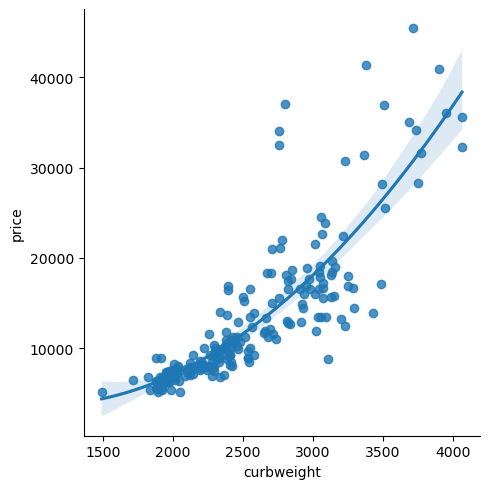

In [7]:
sns.lmplot(x = 'curbweight', y = 'price', data = data, order = 2);

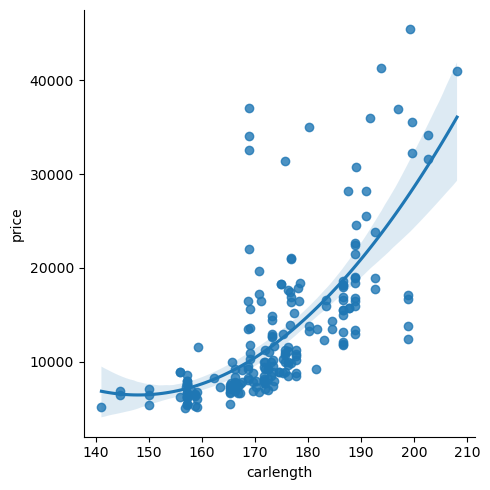

In [14]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order = 2)

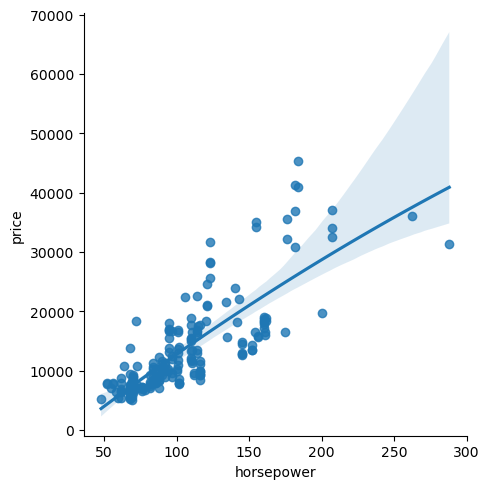

In [15]:
sns.lmplot(x = 'horsepower', y = 'price', data = data, order = 2)

In [16]:
X = data.drop('price', axis= 1)
y = data.price

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
print("Number of training sample:", X_train.shape[0])
print("Number of testing sample:", X_test.shape[0])

Number of training sample: 143
Number of testing sample: 62


In [18]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [19]:
predicted = lm.predict(X_test)


In [20]:
print("R^2 score on training data:", lm.score(X_train, y_train))
print("R^2 score on testing data:", lm.score(X_test, y_test))

R^2 score on training data: 0.92626533006977
R^2 score on testing data: 0.8478797750436009


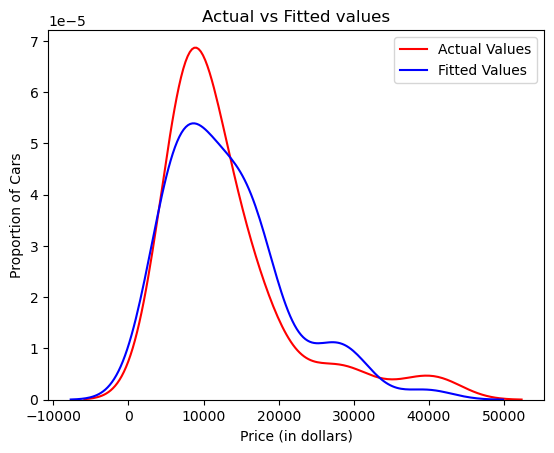

In [25]:
plot_dist(y_test, predicted)

In [26]:
{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': 173288834788427.38,
 'gas': 173288834786874.88,
 'std': 322.6006326086436,
 'turbo': -319.25547880004984,
 'convertible': 1769.8961729655746,
 'hardtop': 3131.5917131662613,
 'hatchback': -1757.0531327286305,
 'sedan': -677.1005521467303,
 'wagon': -2481.4805421324613,
 '4wd': -637.3830438007827,
 'fwd': -269.8330707675496,
 'rwd': 898.1523273241057,
 'dohc': 2469.033677301364,
 'dohcv': -13312.303678206019,
 'l': 2159.751853350836,
 'ohc': 4649.190286213528,
 'ohcf': 6103.9902978625905,
 'ohcv': -2845.3144933761005,
 'rotor': 782.9366711403865,
 'eight': 9226.499420944367,
 'five': -2734.5269332477023,
 'four': -5342.343904683697,
 'six': -2147.3992286475036,
 'three': -0.000244140625,
 'twelve': 214.85571426282021,
 'two': 782.9327648903865,
 'wheelbase': 101.8726068206642,
 'curbweight': 4.848079732557239,
 'enginesize': 23.568875421562197,
 'boreratio': -1780.5478609050253,
 'horsepower': 68.47600443650647,
 'carlength': -65.89428139323942,
 'carwidth': 577.933324031322,

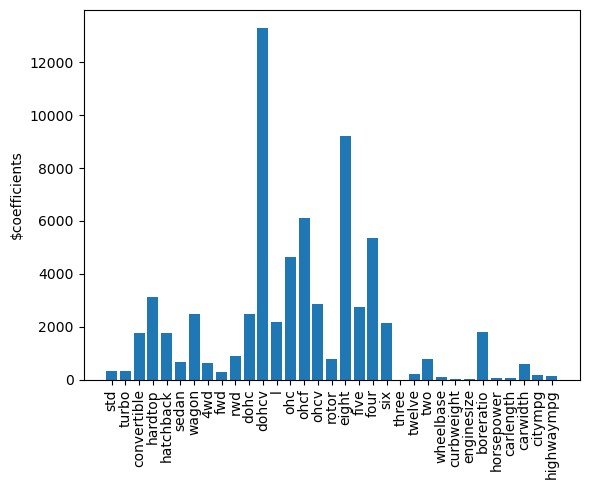

In [29]:
plt.bar(X.columns[2:], abs(lm.coef_[2:]))
plt.xticks(rotation = 90)
plt.ylabel('$coefficients')
plt.show()

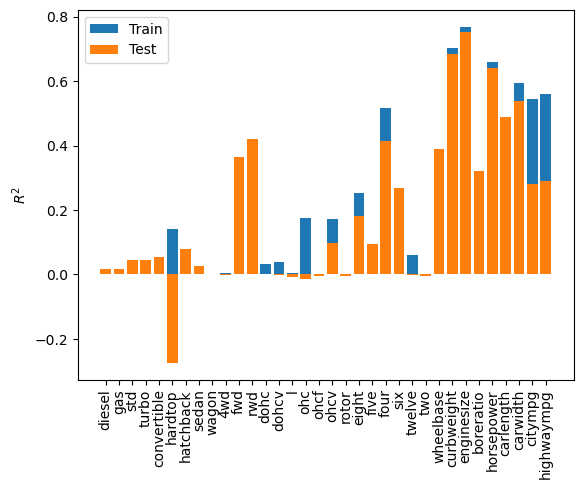

Training R^2 mean value 0.21817773426877918, Testing R^2 mean value 0.1824149303513927
Training R^2 max value 0.7686929078033782, Testing R^2 max value 0.7534902447506853


In [30]:
get_R2_features(lm)

R^2 on training  data  0.9262722224294516
R^2 on testing data  0.8419174509630339


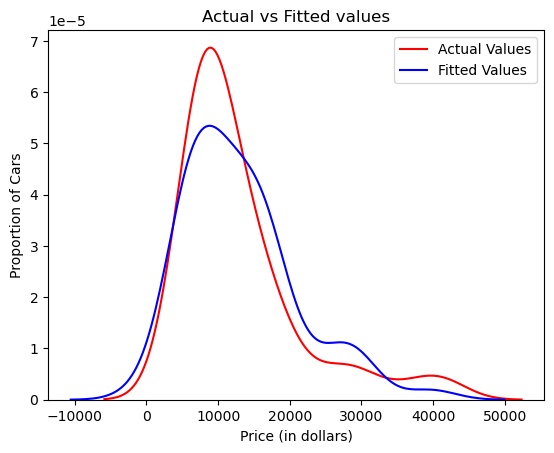

In [32]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dist(y_test,predicted)

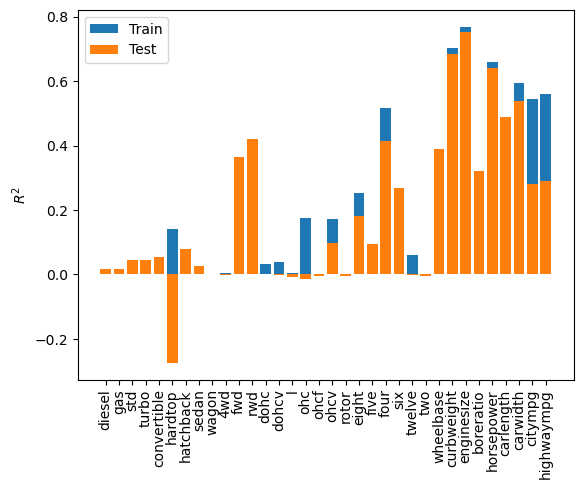

Training R^2 mean value 0.21817773426877915, Testing R^2 mean value 0.18241493035139264
Training R^2 max value 0.7686929078033782, Testing R^2 max value 0.7534902447506853


In [33]:
pipe = Pipeline([('ss',StandardScaler()),('lr', LinearRegression())])
get_R2_features(pipe)

In [34]:
poly_feature = PolynomialFeatures(degree = 2, include_bias = False)

In [35]:
X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.transform(X_test)

In [36]:
print(X_train_poly.shape)

(143, 665)


In [37]:
print(X_test_poly.shape)

(62, 665)


In [38]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
predicted = lm.predict(X_train_poly)

In [40]:
print("R^2 on training data:", lm.score(X_train_poly, y_train))
print("R^2 on testing data:", lm.score(X_test_poly,y_test))

R^2 on training data: 0.998531849797585
R^2 on testing data: -36729.958502235706


In [41]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression()) ]

In [42]:
pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [43]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.998531849797585
R^2 on testing data: -36729.958502235706


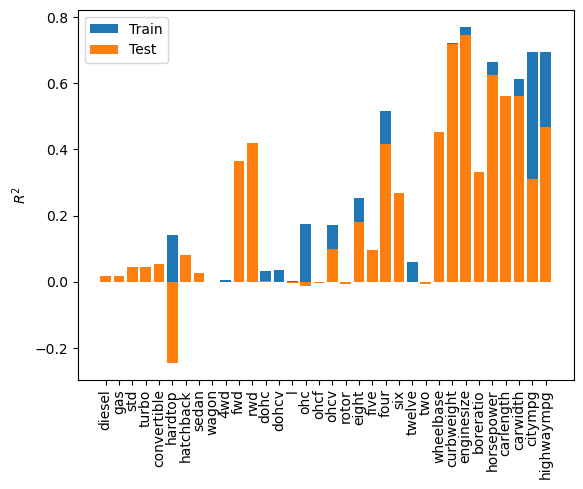

Training R^2 mean value 0.23080994197684732, Testing R^2 mean value 0.19482428470984473
Training R^2 max value 0.7706959974452947, Testing R^2 max value 0.7463370080614307


In [44]:
get_R2_features(pipe)

In [45]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [46]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
}

In [47]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [48]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [50]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

In [51]:
best.score(X_test,y_test)

0.9676510618958535

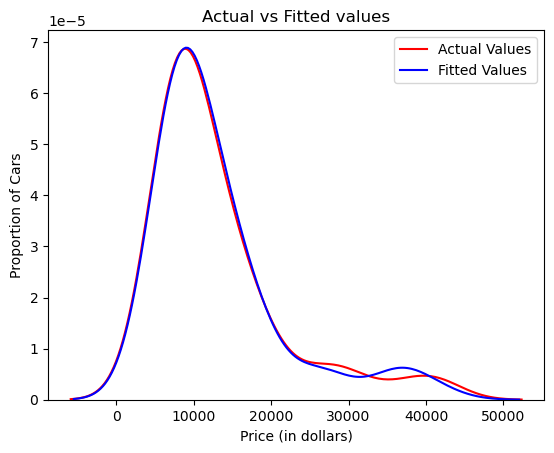

In [53]:
predicted=best.predict(X_test)
plot_dist(y_test,predicted)

diesel
gas
std
turbo
convertible
hardtop
hatchback
sedan
wagon
4wd
fwd
rwd
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
wheelbase
curbweight
enginesize
boreratio
horsepower
carlength
carwidth
citympg
highwaympg


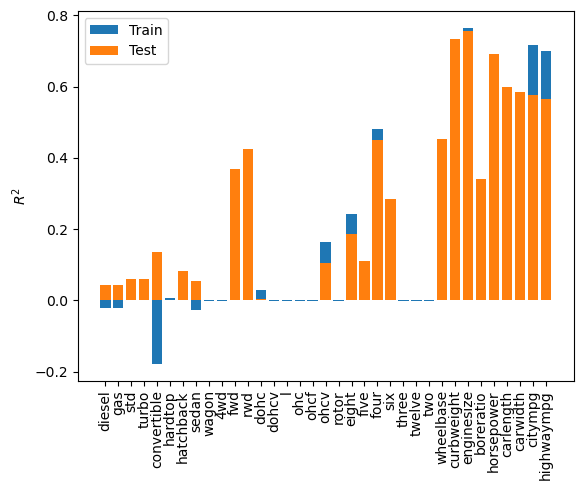

Training R^2 mean value 0.1870832324992052 Testing R^2 mean value 0.22041671563371837 
Training R^2 max value 0.765323637379124 Testing R^2 max value 0.7565151400968062 


In [54]:
features=list(X)
   
    
R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], y_test)
    best=search.best_estimator_
        
    R_2_test.append(best.score(X_test[[feature]],y_test))
    R_2_train.append(best.score(X_train[[feature]],y_train))
    
        
plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )